# Heart Disease Exploratory Data Analysis

#### Objective: Heart disease is one of the leading causes of death in America and being able to detect heart disease promptly can have a number of benefits.  In this project, we will try to detect heart disease using supervised machine learning strategies.  This model is not intended to replace doctors by any means, instead this model is intended to be a tool to assist physicians in their decision making. 

#### Data Source: https://www.kaggle.com/fedesoriano/heart-failure-prediction

##### Kaggle Project overview:
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of five CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from matplotlib.figure import Figure

In [2]:
heart_data=pd.read_csv("heart.csv.xls")

In [3]:
heart_data2=heart_data

##I will use heart_data2 for seperate analysis later that will have a different data cleaning methodology.
##heart_data2 will have lines removed that are missing cholesterol data.

In [4]:
heart_data2 = heart_data2[heart_data2.Cholesterol != 0]

In [5]:
heart_data['Cholesterol']=heart_data['Cholesterol'].replace(0,heart_data['Cholesterol'].median())

In [6]:
heart_data['RestingBP']=heart_data['RestingBP'].replace(0,heart_data['RestingBP'].median())

In [7]:
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Breakdown of Patients with/without heart disease

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

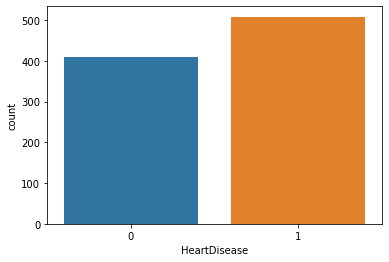

In [8]:
sns.countplot(x="HeartDisease", data=heart_data)

## Exercise Angina

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

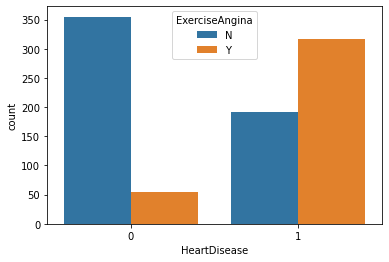

In [9]:
sns.countplot(x="HeartDisease", hue="ExerciseAngina", data=heart_data)

### ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

### Angina is a type of chest pain caused by reduced blood flow to the heart.  It appears that most patients with Angina do indeed have heart disease but angina is not always observed in those with heart disease.  

### Summarized as: Do you have chest pain when you exercise.

## ST_Slope

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

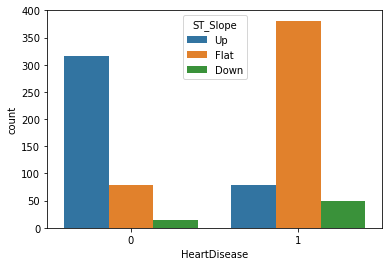

In [10]:
sns.countplot(x="HeartDisease", hue="ST_Slope", data=heart_data)

#### ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

#### "The ST segment is the flat, isoelectric section of the ECG between the end of the S wave (the J point) and the beginning of the T wave."
https://litfl.com/st-segment-ecg-library/
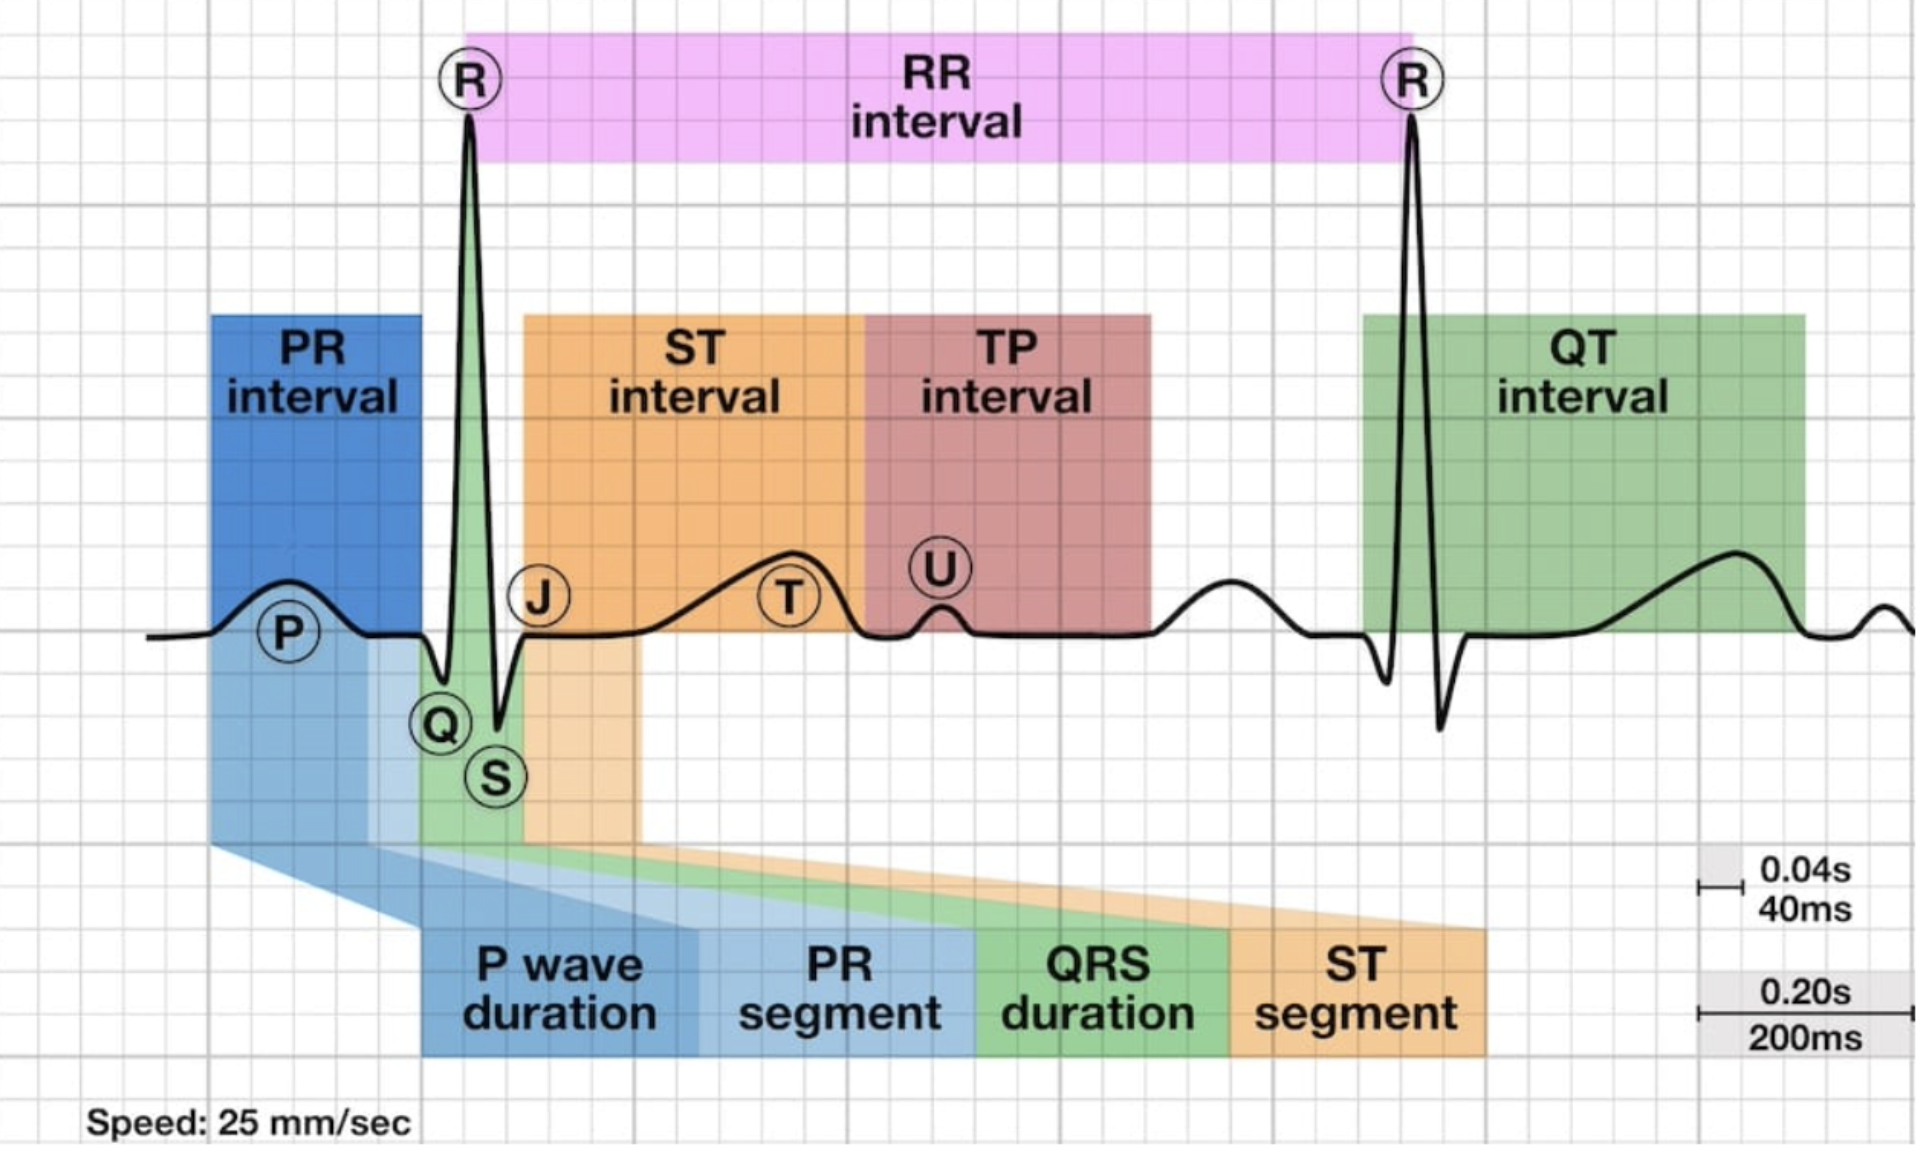

## Sex

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

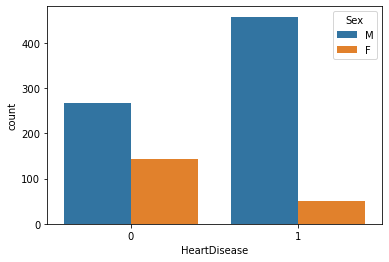

In [11]:
sns.countplot(x="HeartDisease", hue="Sex", data=heart_data)

## Chest Pain Type

#### ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

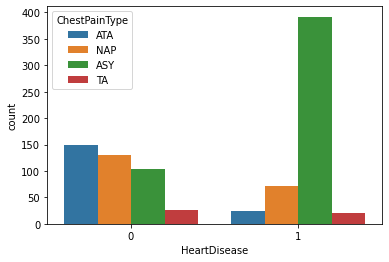

In [12]:
sns.countplot(x="HeartDisease", hue="ChestPainType", data=heart_data)

#### We see that a majority of patients with heart disease fall into the asymptomatic Coronary Heart Disease bar.

## Resting Electrocardiography

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

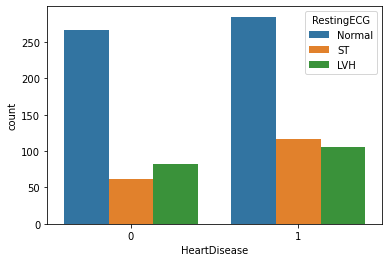

In [13]:
sns.countplot(x="HeartDisease", hue="RestingECG", data=heart_data)

## Fasting Blood Pressure

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

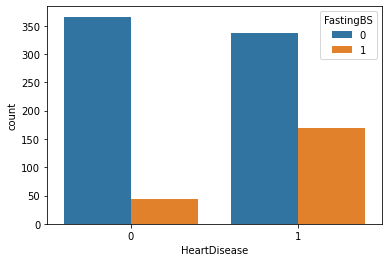

In [14]:
sns.countplot(x="HeartDisease", hue="FastingBS", data=heart_data)

### FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
### Set as a categorical variable

## Age Distribution

<AxesSubplot:ylabel='Frequency'>

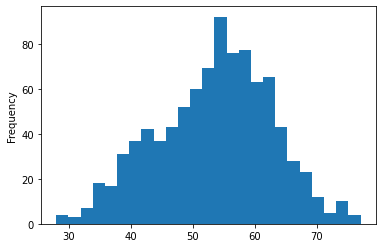

In [15]:
heart_data["Age"].plot.hist(bins=25)

## Resting Blood Pressure

<AxesSubplot:ylabel='Frequency'>

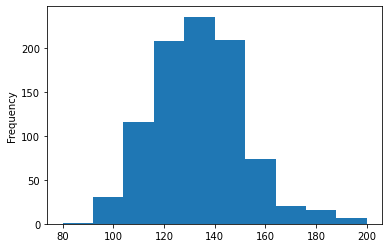

In [16]:
heart_data["RestingBP"].plot.hist(bins=10)

## Cholesterol

<AxesSubplot:ylabel='Frequency'>

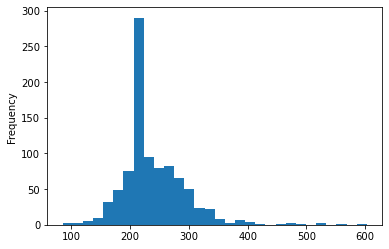

In [17]:
heart_data["Cholesterol"].plot.hist(bins=30)

I filled in missing cholesterol values with the median, and therefore, the tall bar in the histogram above shows high frequency.

## Cholesterol (missing values removed instead of filling in with median)

<AxesSubplot:ylabel='Frequency'>

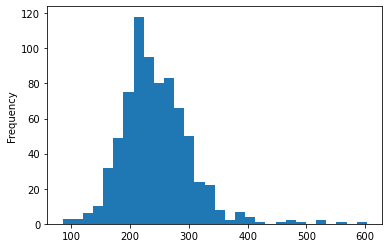

In [18]:
heart_data2["Cholesterol"].plot.hist(bins=30)

High Cholesterol is frequently labeled as 240 and higher.  We will run a seperate analysis for prevelance of heart disease in patients with cholesterol over 240

## Max Heart Rate

<AxesSubplot:ylabel='Frequency'>

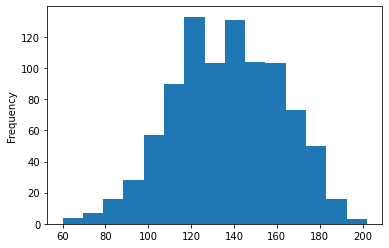

In [19]:
heart_data["MaxHR"].plot.hist(bins=15)

## Oldpeak

<AxesSubplot:ylabel='Frequency'>

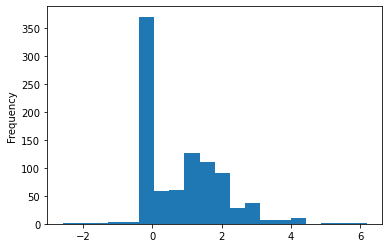

In [20]:
heart_data["Oldpeak"].plot.hist(bins=20)

### Splitting data into two tables of 'No Heart Disease' and "Yes Heart Disease" for further analysis

In [21]:
NO_HD=heart_data[heart_data['HeartDisease']==0]

In [22]:
NO_HD

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,56,M,ATA,130,221,0,LVH,163,N,0.0,Up,0
904,56,M,ATA,120,240,0,Normal,169,N,0.0,Down,0
906,55,F,ATA,132,342,0,Normal,166,N,1.2,Up,0
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0


In [23]:
YES_HD=heart_data[heart_data['HeartDisease']==1]

In [24]:
YES_HD

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


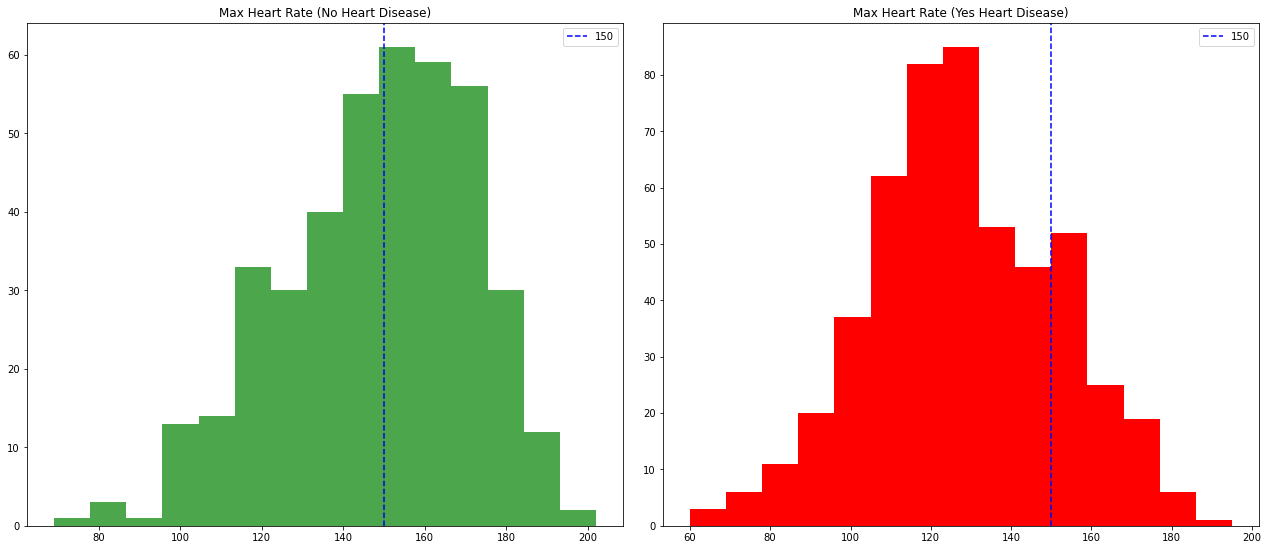

In [112]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 8, forward=True)

ax[0].hist(NO_HD["MaxHR"], bins=15, alpha = 0.7, color = 'g')
ax[0].axvline(x=150, c='b', ls='--', alpha=1, label=str(150))
ax[0].title.set_text('Max Heart Rate (No Heart Disease)')
ax[1].title.set_text('Max Heart Rate (Yes Heart Disease)')
ax[0].legend()


ax[1].hist(YES_HD["MaxHR"], bins=15, alpha = 1, color = 'r')
ax[1].axvline(x=150, c='b', ls='--', alpha=1, label=str(150))
fig.tight_layout(pad=2.0)
ax[1].legend()
plt.show()

### We can see a general pattern in the histogram above that there are higher max heart rates in those without heart disease but as you will see below, your recommended max heart rate is significantly dependent on your age.

### There are two methods frequently used for suggested Max Heart Rate:

#### Tanaka's formula = 208 minus (age x 0.7) = suggested maximum heart rate 
#### Gulati’s formula = 206 minus (age x 0.88) = suggested maximum heart rate 

#### Reference: https://www.medicalnewstoday.com/articles/326361



### I am going to add columns to our existing table to include suggested max heart rate using both the Tanaka and Gulati formulas.  I will also add a column that represents the difference from suggested Max rate rate and actual max heart rate.

In [26]:
heart_data["Tanaka"]=208-(heart_data["Age"]*0.7)

In [27]:
heart_data["Gulati"]=206-(heart_data["Age"]*0.88)

In [28]:
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Tanaka,Gulati
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,180.0,170.80
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,173.7,162.88
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,182.1,173.44
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,174.4,163.76
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,170.2,158.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,176.5,166.40
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,160.4,146.16
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,168.1,155.84
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,168.1,155.84


In [29]:
heart_data["TanakaDiff"]=heart_data["MaxHR"]-heart_data["Tanaka"]

In [30]:
heart_data["GulatiDiff"]=heart_data["MaxHR"]-heart_data["Gulati"]

In [31]:
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Tanaka,Gulati,TanakaDiff,GulatiDiff
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,180.0,170.80,-8.0,1.20
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,173.7,162.88,-17.7,-6.88
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,182.1,173.44,-84.1,-75.44
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,174.4,163.76,-66.4,-55.76
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,170.2,158.48,-48.2,-36.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,176.5,166.40,-44.5,-34.40
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,160.4,146.16,-19.4,-5.16
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,168.1,155.84,-53.1,-40.84
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,168.1,155.84,5.9,18.16


## Now, I will split the data into two tables again:
## One dataframe for No heart disease and one for Yes heart disease.

In [32]:
NO_HD2=heart_data[heart_data['HeartDisease']==0]

In [33]:
YES_HD2=heart_data[heart_data['HeartDisease']==1]

In [34]:
NO_HD2["TanakaDiff"].mean()

-24.46292682926829

In [35]:
YES_HD2["TanakaDiff"].mean()

-41.21476377952756

In [48]:
NO_HD2["GulatiDiff"].mean()

-13.363707317073153

In [49]:
YES_HD2["GulatiDiff"].mean()

-29.152834645669284

#### The next objective is to run an analysis similar to what was previously done for max heart rate but instead look at the Tanaka difference and the Gulati Difference

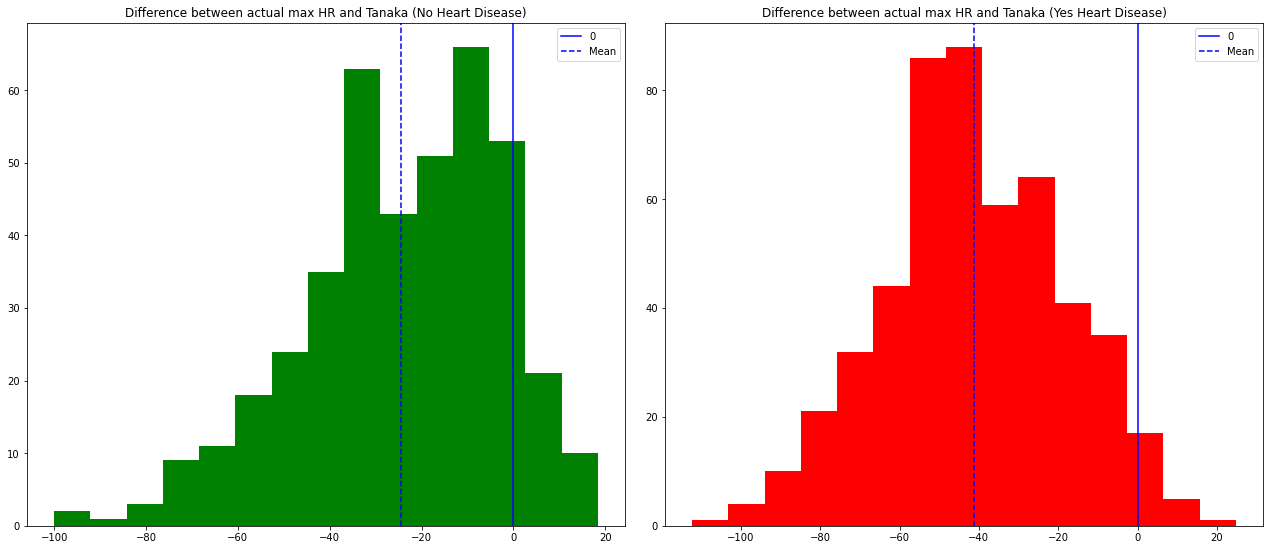

In [107]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 8, forward=True)

ax[0].hist(NO_HD2["TanakaDiff"], bins=15, alpha = 1, color = 'g')
ax[0].axvline(x=0, c='b', ls='solid', alpha=1, label='0')
ax[0].axvline(x=NO_HD2["TanakaDiff"].mean(), c='b', ls='--', alpha=1, label="Mean")
ax[0].title.set_text('Difference between actual max HR and Tanaka (No Heart Disease)')
ax[1].title.set_text('Difference between actual max HR and Tanaka (Yes Heart Disease)')


ax[1].hist(YES_HD2["TanakaDiff"], bins=15, alpha = 1, color = 'r')
ax[1].axvline(x=0, c='b', ls='solid', alpha=1, label="0")
ax[1].axvline(x=YES_HD2["TanakaDiff"].mean(), c='b', ls='--', alpha=1, label="Mean")
fig.tight_layout(pad=2.0)
ax[0].legend()
ax[1].legend()
plt.show()

#### In the chart above, the solid line represents the theoretical difference (or the desired difference) between the Tanaka Formula and the actual Max Heart Rate. 

#### In the chart above, the dotted line represents the mean difference between the Tanaka Formula and the actual Max Heart Rate.

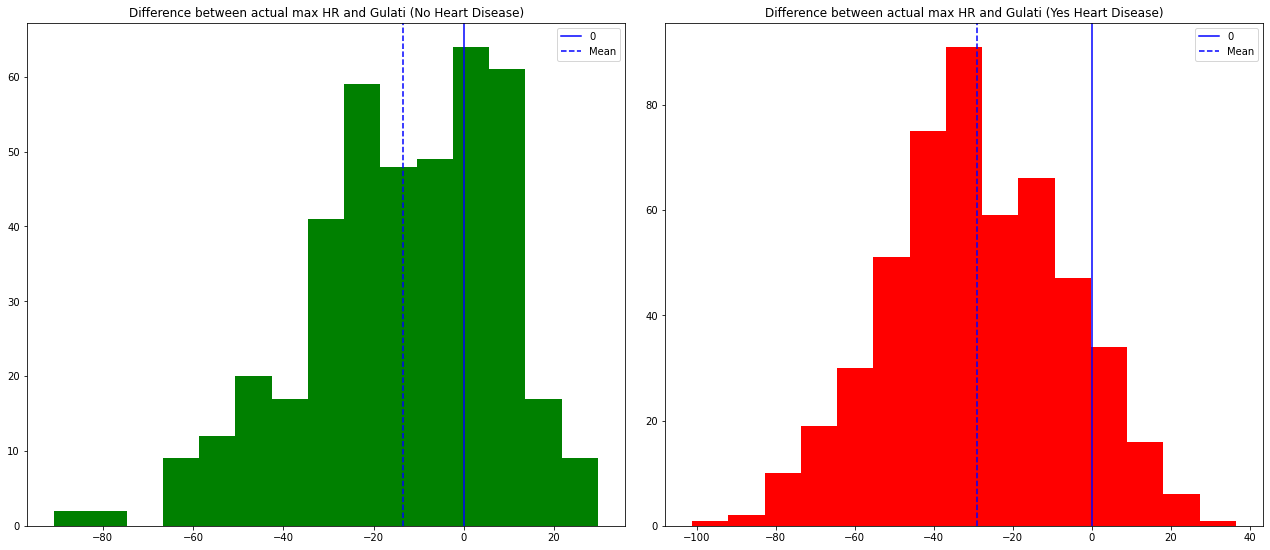

In [106]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 8, forward=True)

ax[0].hist(NO_HD2["GulatiDiff"], bins=15, alpha = 1, color = 'g')
ax[0].axvline(x=0, c='b', ls='solid', alpha=1, label='0')
ax[0].axvline(x=NO_HD2["GulatiDiff"].mean(), c='b', ls='--', alpha=1, label="Mean")
ax[0].title.set_text('Difference between actual max HR and Gulati (No Heart Disease)')
ax[1].title.set_text('Difference between actual max HR and Gulati (Yes Heart Disease)')


ax[1].hist(YES_HD2["GulatiDiff"], bins=15, alpha = 1, color = 'r')
ax[1].axvline(x=0, c='b', ls='solid', alpha=1, label="0")
ax[1].axvline(x=YES_HD2["GulatiDiff"].mean(), c='b', ls='--', alpha=1, label="Mean")
fig.tight_layout(pad=2.0)
ax[0].legend()
ax[1].legend()

plt.show()

### I am interested in seeing if it is better to use the Tanaka forumala or the Gulati formula when correlating to heart disease

In [53]:
For_corr=heart_data[['TanakaDiff', 'GulatiDiff', 'HeartDisease']]

In [56]:
corr2=For_corr.corr()

In [59]:
corr2

,TanakaDiff,GulatiDiff,HeartDisease
TanakaDiff,1.000000,0.997448,-0.351060
GulatiDiff,0.997448,1.000000,-0.333178
HeartDisease,-0.351060,-0.333178,1.000000


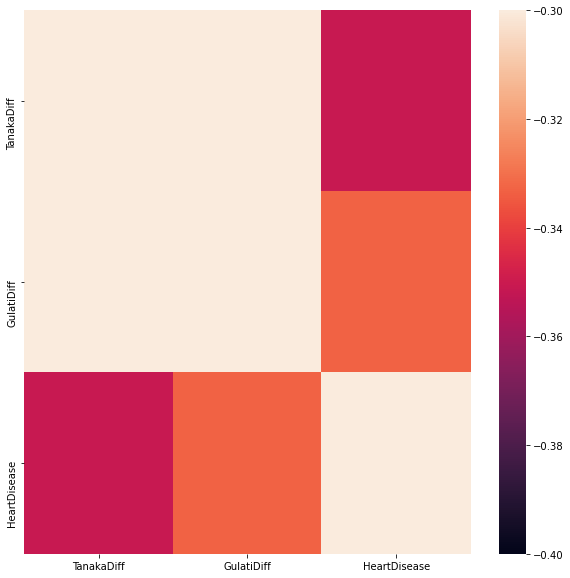

In [68]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(
    corr2, vmin=-0.4, vmax=-0.3)

##### There is a stronger correlation for for the Tanaka difference than the Gulati difference.  In other words, using the Tanaka formula is more meaningful for this study of detecting Heart Disease.

## Comparing Oldpeak values in patients with/without heart disease

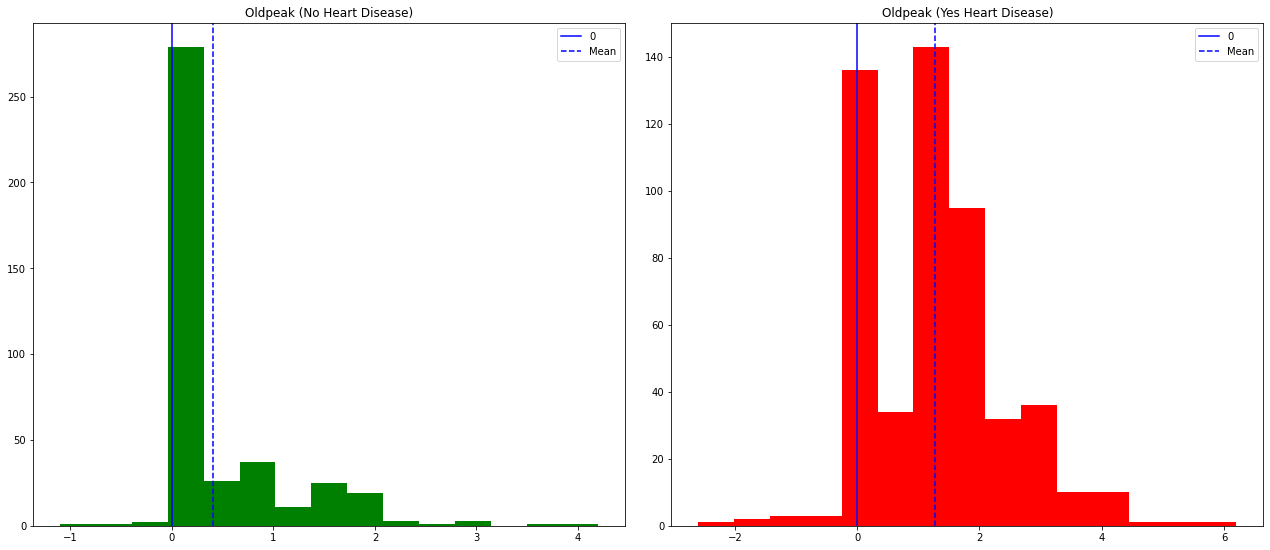

In [105]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 8, forward=True)

ax[0].hist(NO_HD2["Oldpeak"], bins=15, alpha = 1, color = 'g')
ax[0].axvline(x=0, c='b', ls='solid', alpha=1, label='0')
ax[0].axvline(x=NO_HD2["Oldpeak"].mean(), c='b', ls='--', alpha=1, label="Mean")
ax[0].title.set_text('Oldpeak (No Heart Disease)')
ax[1].title.set_text('Oldpeak (Yes Heart Disease)')


ax[1].hist(YES_HD2["Oldpeak"], bins=15, alpha = 1, color = 'r')
ax[1].axvline(x=0, c='b', ls='solid', alpha=1, label="0")
ax[1].axvline(x=YES_HD2["Oldpeak"].mean(), c='b', ls='--', alpha=1, label="Mean")
fig.tight_layout(pad=2.0)
ax[0].legend()
ax[1].legend()
plt.show()

## Reviewing cholesterol data in patients with/without heart disease
### Rows with missing cholesterol values are removed

In [72]:
NO_HD3=heart_data2[heart_data2['HeartDisease']==0]

In [86]:
YES_HD3=heart_data2[heart_data2['HeartDisease']==1]

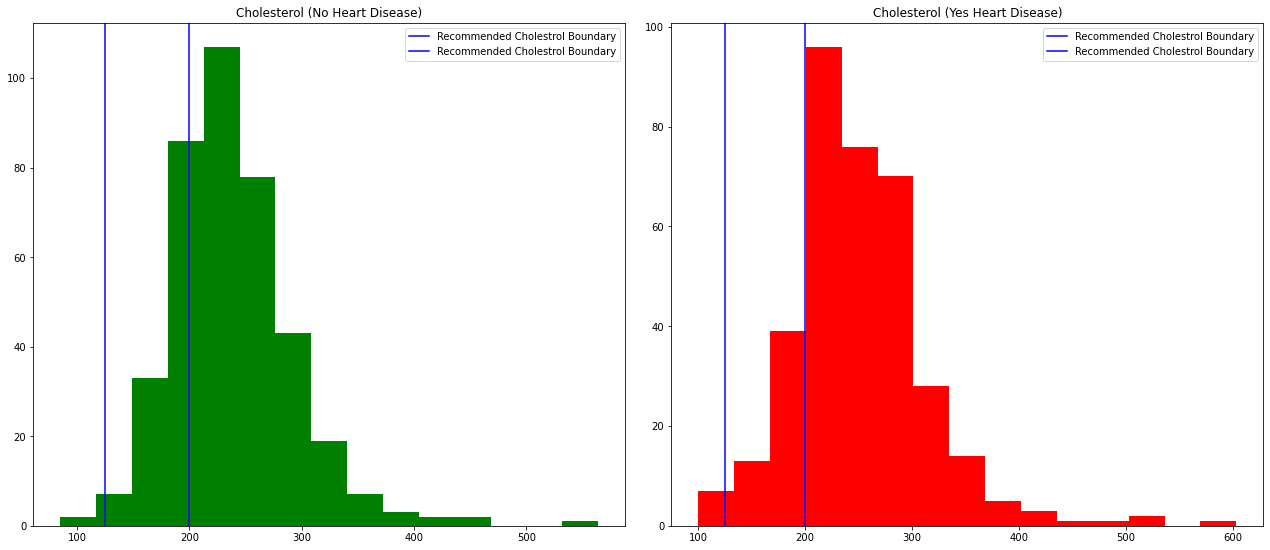

In [104]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 8, forward=True)

ax[0].hist(NO_HD3["Cholesterol"], bins=15, alpha = 1, color = 'g')
ax[0].axvline(x=125, c='b', ls='solid', alpha=1, label="Recommended Cholestrol Boundary")
ax[0].axvline(x=200, c='b', ls='solid', alpha=1, label="Recommended Cholestrol Boundary")
ax[0].title.set_text('Cholesterol (No Heart Disease)')
ax[1].title.set_text('Cholesterol (Yes Heart Disease)')


ax[1].hist(YES_HD3["Cholesterol"], bins=15, alpha = 1, color = 'r')
ax[1].axvline(x=125, c='b', ls='solid', alpha=1, label="Recommended Cholestrol Boundary")
ax[1].axvline(x=200, c='b', ls='solid', alpha=1, label="Recommended Cholestrol Boundary")
fig.tight_layout(pad=2.0)
ax[0].legend()
ax[1].legend()

plt.show()

##### The blue lines mark the boundaries of healthy/recommended cholesterol levels.

##### A benchmark range for healthy cholesterol levels is between 125 and 200 mg/dL.  We can see that in general, most patients (with or without heart disease) have high cholesterol. We do see that there are more patients within the benchmark range in the chart of patients without heart disease.

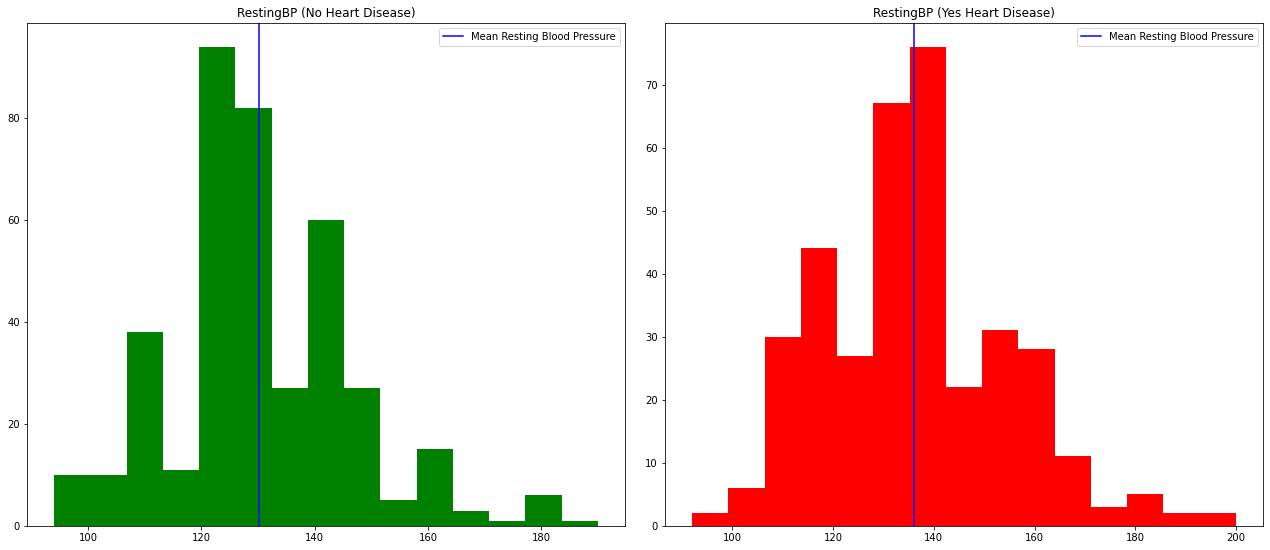

In [103]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 8, forward=True)

ax[0].hist(NO_HD3["RestingBP"], bins=15, alpha = 1, color = 'g')
#ax[0].axvline(x=125, c='b', ls='solid', alpha=1, label="0")
ax[0].axvline(x=NO_HD3["RestingBP"].mean(), c='b', ls='solid', alpha=1, label="Mean Resting Blood Pressure")
ax[0].title.set_text('RestingBP (No Heart Disease)')
ax[1].title.set_text('RestingBP (Yes Heart Disease)')


ax[1].hist(YES_HD3["RestingBP"], bins=15, alpha = 1, color = 'r')
#ax[1].axvline(x=125, c='b', ls='solid', alpha=1, label="0")
ax[1].axvline(x=YES_HD3["RestingBP"].mean(), c='b', ls='solid', alpha=1, label="Mean Resting Blood Pressure")
fig.tight_layout(pad=2.0)
ax[0].legend()
ax[1].legend()
plt.show()

# Conclusion

### In completeing this analysis we can see the attributes that have some correlation to heart disease.  While we find some general patterns, it is apparent that our data is complex and we must consider a range of factors before predicting heart diseas. I will need to examine all of these factors together within a supervised machine learning model to better predict and understand heart disease.